In [112]:
import numpy as np
import pandas as pd
# from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

import pandas as pd
from scipy.spatial import distance_matrix
import numpy as np
import matplotlib.pyplot as plt
import itertools
import copy
from collections import Counter
from TrackReconstruction_functions import *


hits_true = pd.read_hdf("../data/ATPC_0nubb/newfiles/ATPC_0nubb_1bar_smear_0.h5", "MC/hits")
hits      = pd.read_hdf("../data/ATPC_0nubb/newfiles/ATPC_0nubb_1bar_5.0percent_smear_0.h5", "MC/hits")
# hits      = pd.read_hdf("../data/ATPC_0nubb/newfiles/ATPC_0nubb_1bar_0.1percent_smear_1122.h5", "MC/hits")


# hits_true = pd.read_hdf("../data/krishan_bad_tracks/data/sophronia_1_208Tl.h5", "/MC/hits")
# hits = pd.read_hdf("../data/krishan_bad_tracks/data/sophronia_1_208Tl.h5", "/RECO/Events")
# hits_true.rename(columns={"event": "event_id"}, inplace=True)
# hits.rename(columns={"event": "event_id", "Ec": "energy", "X": "x", "Y": "y", "Z": "z"}, inplace=True)
# hits["event_id"] = (hits["event_id"]/2).astype(int)

display(hits)
print(hits.event_id.unique())

,event_id,x,y,z,energy
0,125,-114.068176,-646.118042,1394.879395,0.000025
1,125,-113.450172,-649.188843,1401.929199,0.000248
2,125,-117.535690,-640.701904,1402.194092,0.001538
3,125,-119.705025,-650.034668,1402.634644,0.001612
4,125,-111.893044,-639.123657,1402.636108,0.001414
...,...,...,...,...,...
218622,184,1855.931152,-1697.955078,2901.639893,0.000025
218623,184,1846.817627,-1671.772705,2905.415771,0.000050
218624,184,1846.279419,-1687.976685,2906.922607,0.000025
218625,184,1846.921143,-1684.070068,2906.968506,0.000025


[125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142
 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160
 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178
 179 180 181 182 183 184]


,event_id,x,y,z,energy
28929,153,-103.116074,-311.392731,3847.921143,0.001339
28930,153,-102.136604,-308.544861,3848.071533,0.002530
28931,153,-101.263527,-305.829956,3848.513428,0.001017
28932,153,-104.688118,-315.465027,3848.662354,0.000694
28933,153,-116.351738,-333.246979,3848.789307,0.001438
...,...,...,...,...,...
29944,153,-1199.652710,-850.198120,4505.816895,0.026610
29945,153,-1184.421509,-874.566895,4506.310059,0.004117
29946,153,-1179.872192,-877.096558,4507.183594,0.000744
29947,153,-1181.684082,-875.757568,4507.893066,0.001438


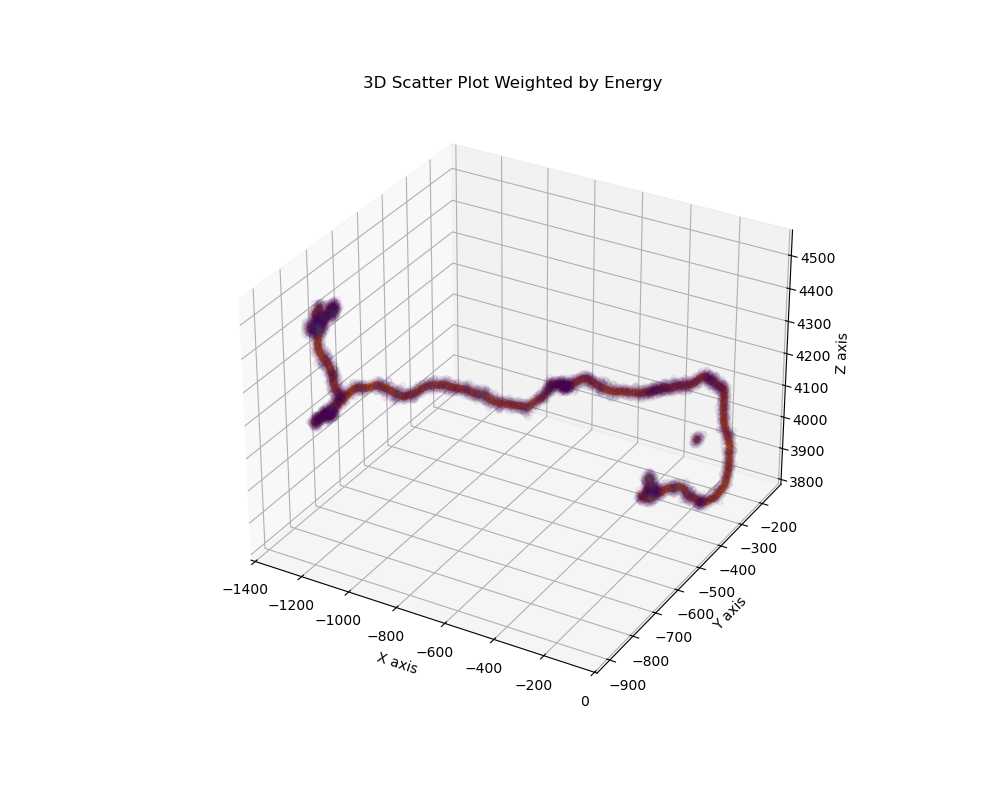

In [113]:
%matplotlib widget 

eid=153

data = hits[hits.event_id ==eid]
data_true = hits_true[hits_true.event_id ==eid]
display(data_true)


# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')


cut_data = data[data.energy > 0.0000]

# Normalize the energy values for the colors
cmap = plt.get_cmap('viridis')
norm = plt.Normalize(cut_data.energy.min(), cut_data.energy.max())
colors = cmap(norm(cut_data.energy))


# Plot the scatter plot
scatter = ax.scatter(cut_data.x, cut_data.y, cut_data.z, c=colors, marker='o', alpha=0.05)
ax.scatter(data_true['x'], data_true['y'], data_true['z'], marker='o', c="DarkOrange")

# ax.scatter(data_true['x'], data_true['y'], data_true['z']+3000, marker='o', c="DarkRed")

# Add color bar to indicate energy values
mappable = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
mappable.set_array(data.energy)
# cbar = plt.colorbar(mappable)
# cbar.set_label('Energy')

# Set labels and title
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
ax.set_title('3D Scatter Plot Weighted by Energy')

plt.show()

In [114]:
# There seems to be a duplicate row sometimes
data = data.drop_duplicates()

# display(data)
data = data[['event_id','x', 'y', 'z',"energy"]]

# Apply an energy cut
data = data[data.energy > 0.0000]

# shuffle the data to ensure we dont use g4 ordering
data = data.sample(frac=1).reset_index(drop=True)

# then sort it based on the x,y,z
data = data.sort_values(by=['x', "y", "z"]).reset_index(drop=True)

# Calculate the distance matrix
dist_matrix = distance_matrix(data[['x', 'y', 'z']], data[['x', 'y', 'z']])

display(data)
print(len(dist_matrix))

,event_id,x,y,z,energy
0,153,-1327.645386,-719.157715,4101.701660,0.000099
1,153,-1326.676514,-728.201172,4118.228516,0.000025
2,153,-1326.670898,-711.306519,4110.616211,0.000422
3,153,-1326.601196,-720.055847,4116.806152,0.000099
4,153,-1326.502563,-719.705750,4110.573242,0.000446
...,...,...,...,...,...
4319,153,-83.865730,-288.163635,3848.496582,0.000025
4320,153,-83.670715,-253.603271,3859.784912,0.000025
4321,153,-82.774445,-261.067780,3863.325684,0.000050
4322,153,-81.548820,-268.741760,3851.325439,0.000025


4324


Mean z: 4128.887  diffusion =  6.09589902010206
Mean Sigma:  35
145 2.4636815925041446


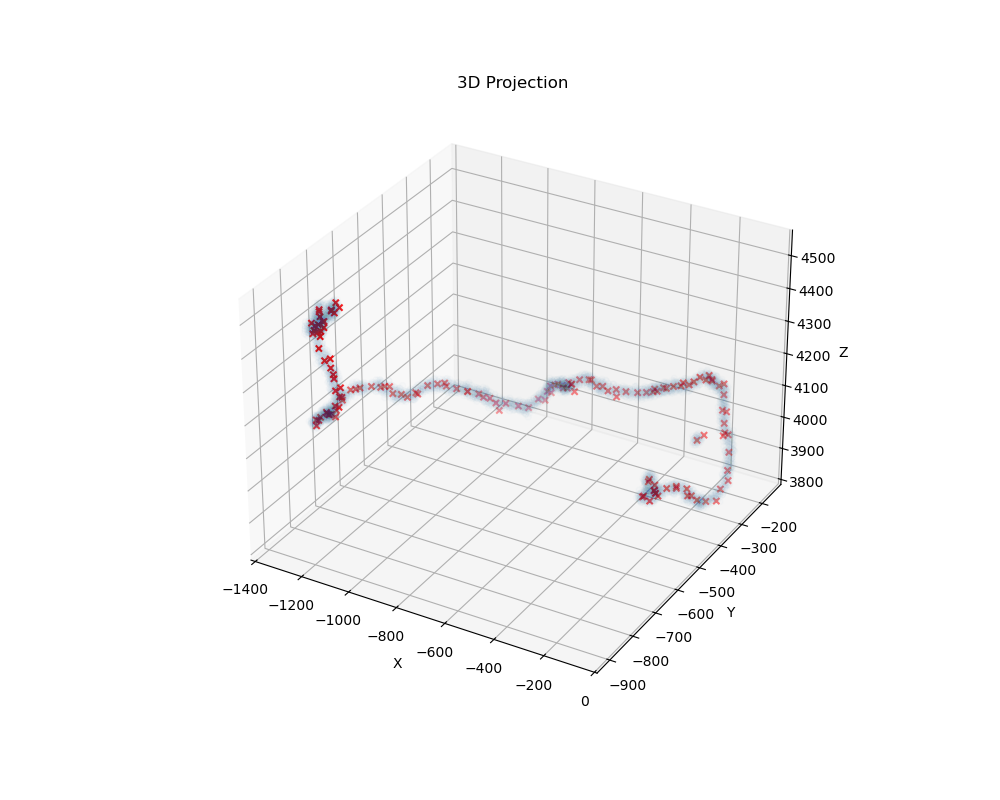

In [115]:

# all_visited = []
# radius  = 20 # workes well for 2 sigma c02 mix
# radius  = 0.5*np.sqrt(data.z.mean())
# print(radius)


def GetMinima(index, all_visited_, input_data, temp_dist_matrix, R):


    distances_from_index = temp_dist_matrix[index] # distances for node to others
    sorted_indices = np.argsort(distances_from_index) # indexes sorted by smallest distance

    closest_nodes = sorted_indices[distances_from_index[sorted_indices] < R]
    
    closest_nodes = list(set(closest_nodes) - set(all_visited_))

    selected_rows = input_data.iloc[closest_nodes] # Df containing the nodes within distance

    # Compute the mean of x, y, and z columns
    mean_x = selected_rows['x'].median()
    mean_y = selected_rows['y'].median()
    mean_z = selected_rows['z'].median()
    energy_sum = selected_rows['energy'].sum()
    mean_point = np.array([mean_x, mean_y, mean_z, energy_sum])

    all_visited = all_visited_ + list(closest_nodes)

    return mean_point, all_visited


def Cluster(input_data, R):

    node_centers = []
    all_visited = []
    indexes = input_data.index.values
    indexes_set = set(indexes)

    temp_dist_matrix = distance_matrix(input_data[['x', 'y', 'z']], input_data[['x', 'y', 'z']])

    for i in range(len(input_data)):

        all_visited_set = set(all_visited)

        # Convert arrays to sets and perform the difference
        filtered_indexes = list(indexes_set - all_visited_set)

        if not filtered_indexes:
            break

        # random_index = np.random.choice(filtered_indexes)
        random_index = filtered_indexes[0]
        median, all_visited = GetMinima(random_index, all_visited, input_data, temp_dist_matrix, R)

        node_centers.append(median)

    return pd.DataFrame(node_centers, columns=['x', 'y', 'z', 'energy'])


print("Mean z:", data.z.mean(), " diffusion = ", 0.3*np.sqrt(0.1*data.z.mean()))

mean_sigma = round(6*0.29*np.sqrt(0.1*data.z.mean()))
# mean_sigma = round(6*0.9*np.sqrt(0.1*data.z.mean()))
print("Mean Sigma: ", mean_sigma)

node_centers_df = Cluster(data, mean_sigma)
# node_centers_df = Cluster(node_centers_df, 20)
# node_centers_df = Cluster(node_centers_df, 30)
# node_centers_df = Cluster(node_centers_df, 20)
# node_centers_df = Cluster(node_centers_df, 20)
# node_centers_df = Cluster(node_centers_df, 75)

# display(node_centers_df)
print(len(node_centers_df), node_centers_df.energy.sum())

# -------

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')


ax.scatter(data['x'], data['y'], data['z'], marker='o',alpha=0.01)
# ax.scatter(data_true['x'], data_true['y'], data_true['z'], marker='o')

ax.scatter(node_centers_df['x'], node_centers_df['y'], node_centers_df['z'], marker='x',c="r")



ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('3D Projection')
plt.show()



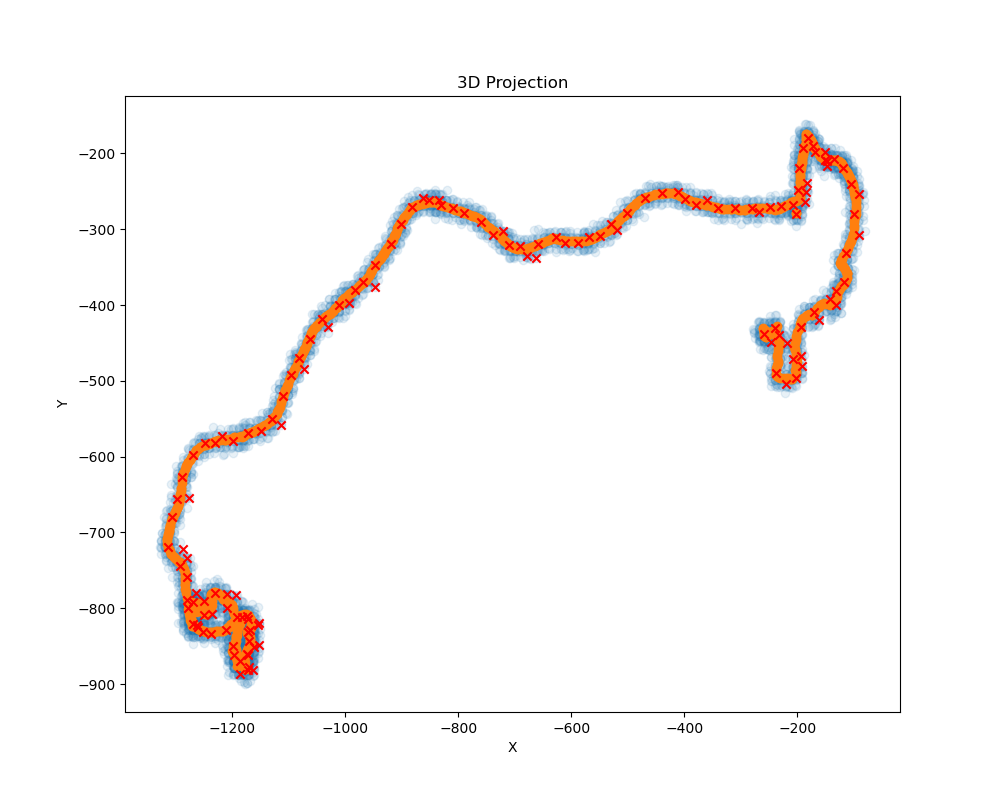

In [116]:
fig= plt.figure(figsize=(10, 8))

plt.scatter(data['x'], data['y'], marker='o',alpha=0.1)
plt.scatter(data_true['x'], data_true['y'], marker='o')
plt.scatter(node_centers_df['x'], node_centers_df['y'], marker='x',c="r")

plt.xlabel('X')
plt.ylabel('Y')

plt.title('3D Projection')
plt.show()


In [117]:
# Create the bins ---- 
xmin=-3000
xmax=3000
xbw=mean_sigma*1

ymin=-3000
ymax=3000
ybw=mean_sigma*1

zmin=0
zmax=6000
zbw=mean_sigma*1

# bw = 10 works well for co2 mix with 2 sigma diffusion

# bins for x, y, z
xbins = np.arange(xmin, xmax+xbw, xbw)
ybins = np.arange(ymin, ymax+ybw, ybw)
zbins = np.arange(zmin, zmax+zbw, zbw)

# center bins for x, y, z
xbin_c = xbins[:-1] + xbw / 2
ybin_c = ybins[:-1] + ybw / 2
zbin_c = zbins[:-1] + zbw / 2


print(ybins)

databin = node_centers_df.copy()
databin["event_id"] = eid

# Now lets bin the data
databin['x_smear'] = pd.cut(x=databin['x'], bins=xbins,labels=xbin_c, include_lowest=True)
databin['y_smear'] = pd.cut(x=databin['y'], bins=ybins,labels=ybin_c, include_lowest=True)
databin['z_smear'] = pd.cut(x=databin['z'], bins=zbins,labels=zbin_c, include_lowest=True)



# Drop rows with any NaN values
databin = databin.dropna()

# Dictionary to store results
aggregated_data = {}

# Iterate through the DataFrame row by row
for _, row in databin.iterrows():
    key = (row['event_id'], row['x_smear'], row['y_smear'], row['z_smear'])
    
    if key not in aggregated_data:
        # Initialize the aggregation for a new group
        aggregated_data[key] = {
            'x_sum': row['x'],
            'y_sum': row['y'],
            'z_sum': row['z'],
            'energy_sum': row['energy'],
            'count': 1
        }
    else:
        # Update existing group values
        aggregated_data[key]['x_sum'] += row['x']
        aggregated_data[key]['y_sum'] += row['y']
        aggregated_data[key]['z_sum'] += row['z']
        aggregated_data[key]['energy_sum'] += row['energy']
        aggregated_data[key]['count'] += 1

# Convert aggregated data into a DataFrame
result = []
for key, values in aggregated_data.items():
    event_id, x_smear, y_smear, z_smear = key
    result.append({
        'event_id': event_id,
        'x_smear': x_smear,
        'y_smear': y_smear,
        'z_smear': z_smear,
        'x': values['x_sum'] / values['count'],   # Mean x
        'y': values['y_sum'] / values['count'],   # Mean y
        'z': values['z_sum'] / values['count'],   # Mean z
        'energy': values['energy_sum']            # Sum energy
    })

# Create final DataFrame
databin = pd.DataFrame(result)
display(databin)


[-3000 -2965 -2930 -2895 -2860 -2825 -2790 -2755 -2720 -2685 -2650 -2615
 -2580 -2545 -2510 -2475 -2440 -2405 -2370 -2335 -2300 -2265 -2230 -2195
 -2160 -2125 -2090 -2055 -2020 -1985 -1950 -1915 -1880 -1845 -1810 -1775
 -1740 -1705 -1670 -1635 -1600 -1565 -1530 -1495 -1460 -1425 -1390 -1355
 -1320 -1285 -1250 -1215 -1180 -1145 -1110 -1075 -1040 -1005  -970  -935
  -900  -865  -830  -795  -760  -725  -690  -655  -620  -585  -550  -515
  -480  -445  -410  -375  -340  -305  -270  -235  -200  -165  -130   -95
   -60   -25    10    45    80   115   150   185   220   255   290   325
   360   395   430   465   500   535   570   605   640   675   710   745
   780   815   850   885   920   955   990  1025  1060  1095  1130  1165
  1200  1235  1270  1305  1340  1375  1410  1445  1480  1515  1550  1585
  1620  1655  1690  1725  1760  1795  1830  1865  1900  1935  1970  2005
  2040  2075  2110  2145  2180  2215  2250  2285  2320  2355  2390  2425
  2460  2495  2530  2565  2600  2635  2670  2705  2

,event_id,x_smear,y_smear,z_smear,x,y,z,energy
0,153.0,-1302.5,-707.5,4112.5,-1300.741943,-720.761292,4120.185059,0.054758
1,153.0,-1302.5,-672.5,4147.5,-1302.449402,-668.048950,4140.321777,0.027553
2,153.0,-1302.5,-742.5,4112.5,-1293.084473,-744.730103,4129.012695,0.013516
3,153.0,-1302.5,-637.5,4147.5,-1288.564819,-626.741821,4139.642090,0.029289
4,153.0,-1267.5,-777.5,4147.5,-1272.209961,-784.455383,4156.399170,0.031967
...,...,...,...,...,...,...,...,...
108,153.0,-147.5,-427.5,3937.5,-162.025696,-419.208221,3945.561523,0.000446
109,153.0,-147.5,-217.5,4007.5,-151.282913,-208.746872,4010.123779,0.012425
110,153.0,-147.5,-392.5,3937.5,-141.670502,-392.426270,3924.624023,0.027230
111,153.0,-147.5,-392.5,3902.5,-131.771820,-390.647079,3903.531128,0.022370


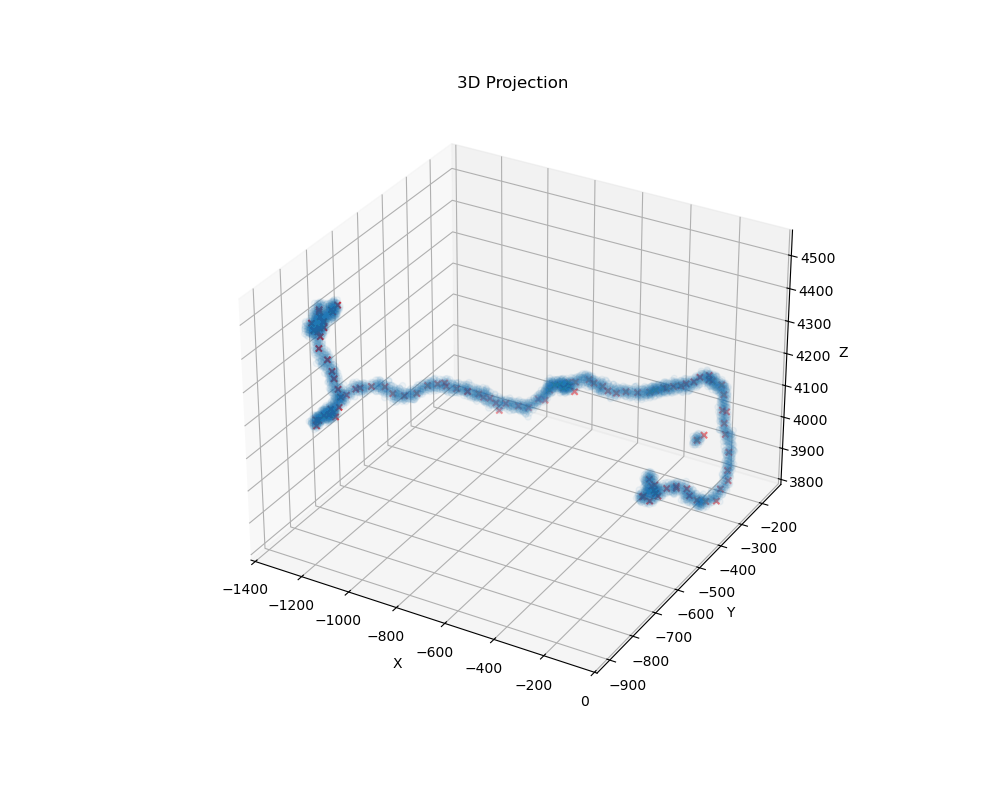

In [118]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')


ax.scatter(data['x'], data['y'], data['z'], marker='o',alpha=0.05)
# ax.scatter(data_true['x'], data_true['y'], data_true['z'], marker='o',color="Teal")

ax.scatter(databin['x'], databin['y'], databin['z'], marker='x',c="r")

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('3D Projection')
plt.show()

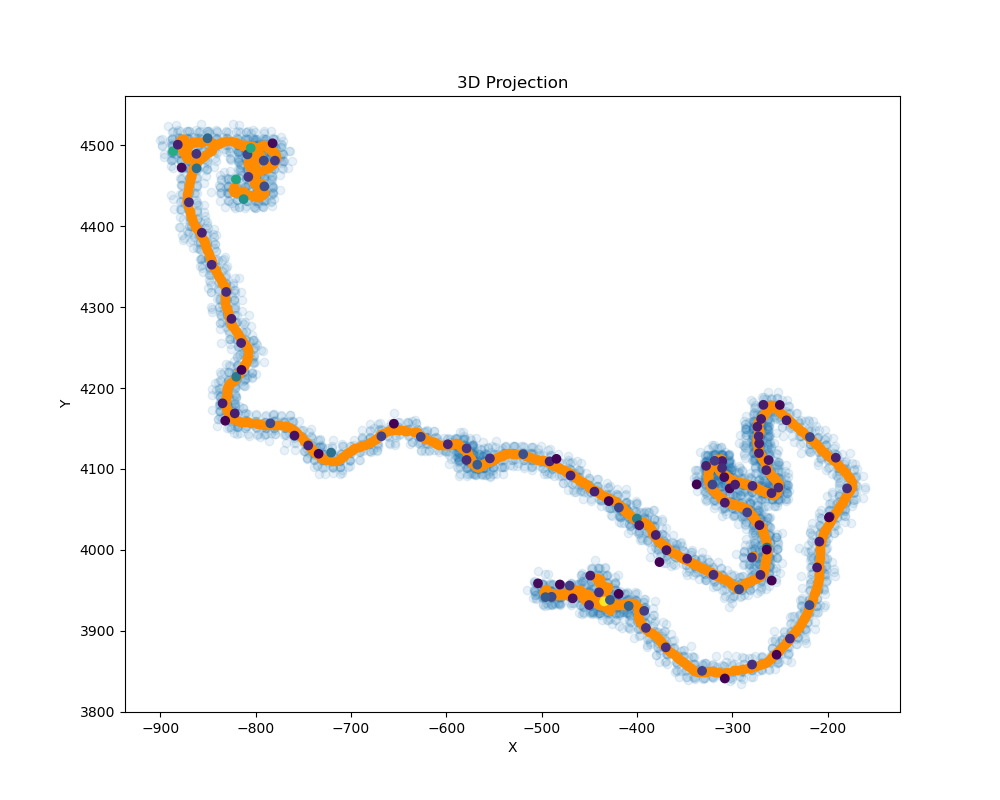

In [119]:
fig= plt.figure(figsize=(10, 8))

plt.scatter(data['y'], data['z'], marker='o',alpha=0.1)
plt.scatter(data_true['y'], data_true['z'], marker='o',color="DarkOrange")
# plt.scatter(data_true['y'], data_true['z'], marker='o',c=data_true["energy"])
plt.scatter(databin['y'], databin['z'], marker='o',c=databin['energy'])

plt.xlabel('X')
plt.ylabel('Y')

plt.title('3D Projection')
plt.show()

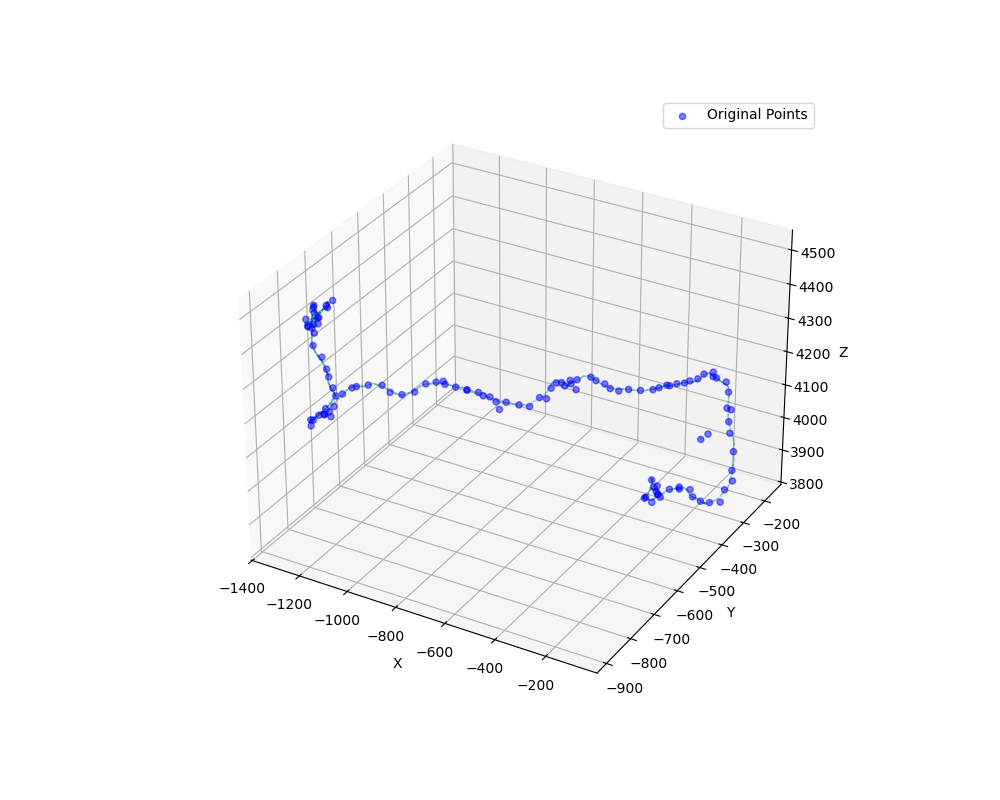

In [120]:

# Plot the original points and the polynomial fit
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(databin.x, databin.y,databin.z, color='blue', label='Original Points', alpha=0.5)
ax.scatter(data_true['x'], data_true['y'], data_true['z'],s=0.1 ,marker='o',color="Teal")

# Labels and legend
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.legend()
plt.show()

,event_id,x_smear,y_smear,z_smear,x,y,z,energy
0,153.0,-1302.5,-707.5,4112.5,-1300.741943,-720.761292,4120.185059,0.054758
1,153.0,-1302.5,-672.5,4147.5,-1302.449402,-668.048950,4140.321777,0.027553
2,153.0,-1302.5,-742.5,4112.5,-1293.084473,-744.730103,4129.012695,0.013516
3,153.0,-1302.5,-637.5,4147.5,-1288.564819,-626.741821,4139.642090,0.029289
4,153.0,-1267.5,-777.5,4147.5,-1272.209961,-784.455383,4156.399170,0.031967
...,...,...,...,...,...,...,...,...
108,153.0,-147.5,-427.5,3937.5,-162.025696,-419.208221,3945.561523,0.000446
109,153.0,-147.5,-217.5,4007.5,-151.282913,-208.746872,4010.123779,0.012425
110,153.0,-147.5,-392.5,3937.5,-141.670502,-392.426270,3924.624023,0.027230
111,153.0,-147.5,-392.5,3902.5,-131.771820,-390.647079,3903.531128,0.022370


Median distance to the closest row: 26.32006682807514
Dist Thresh 127.896
Pass Flag: True
The primary track is:  0
     event_id            x           y            z    energy  id  primary  \
0       153.0 -1270.111694 -812.476685  4433.397461  0.076062   9        1   
1       153.0 -1270.339844 -820.506470  4457.920410  0.087048   8        1   
2       153.0 -1250.685669 -790.734802  4449.200195  0.035861  14        1   
3       153.0 -1236.541016 -807.553955  4460.946289  0.023436  17        1   
4       153.0 -1231.217529 -779.627197  4480.995605  0.025246  19        1   
..        ...          ...         ...          ...       ...  ..      ...   
108     153.0  -202.211243 -495.956146  3941.547119  0.040622  87        1   
109     153.0  -219.803360 -503.805511  3958.558105  0.004613  83        1   
110     153.0  -237.436951 -489.530273  3941.958496  0.033430  80        1   
111     153.0  -186.407776 -263.955017  4000.267334  0.000025  94        0   
112     153.0  -201.559586 

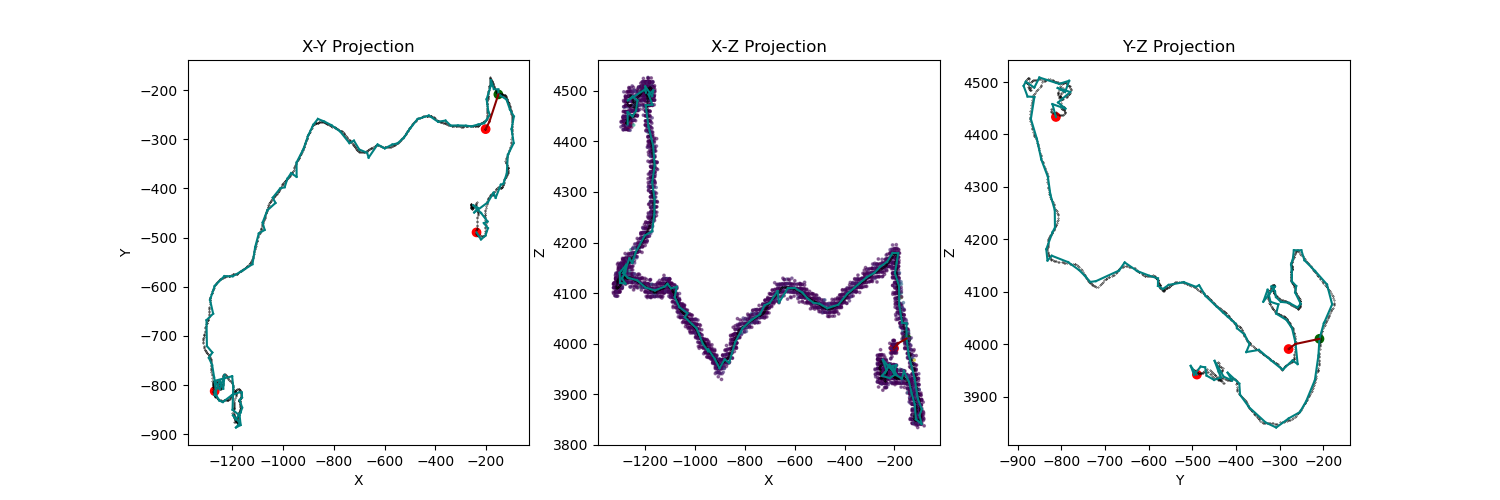

In [124]:
# Apply the tracking reconstruction

display(databin)


df, Tracks, connected_nodes, connection_count, pass_flag = RunTracking(databin[["event_id", "x", "y", "z", "energy"]], 0, 0)

df.index = df.id

# Create subplots
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
# Plot xy projection
plot_tracks(axs[0], df['x'], df['y'], connection_count, 'X', 'Y', Tracks)
# axs[0].scatter(data.x, data.y, c=colors, marker='o', alpha=0.5,s=3)
axs[0].scatter(data_true['x'], data_true['y'], marker='o',c="k", s=0.1)

# Plot xz projection
plot_tracks(axs[1], df['x'], df['z'], connection_count, 'X', 'Z', Tracks)
axs[1].scatter(data.x, data.z, c=colors, marker='o', alpha=0.5,s=3)
axs[1].scatter(data_true['x'], data_true['z'], marker='o',c="k", s=0.1)

# Plot yz projection
plot_tracks(axs[2], df['y'], df['z'], connection_count, 'Y', 'Z', Tracks)
# axs[2].scatter(data.y, data.z, c=colors, marker='o', alpha=0.5,s=3)
axs[2].scatter(data_true['y'], data_true['z'], marker='o',c="k", s=0.1)

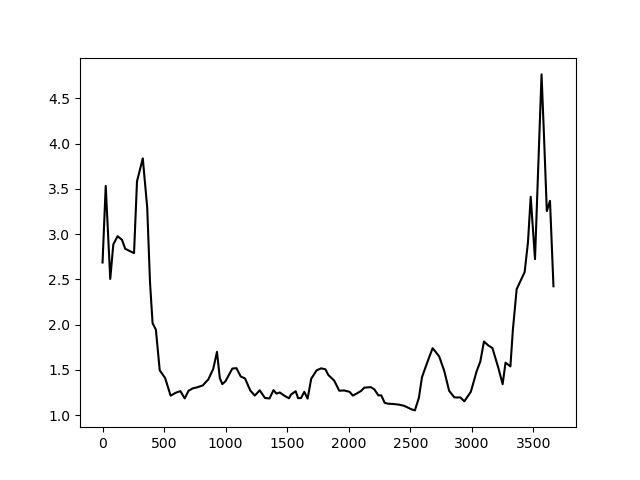

In [122]:
plt.figure()

plt.plot(df[df.primary == 1].cumulative_distance, df[df.primary == 1].Tortuosity, color="k");

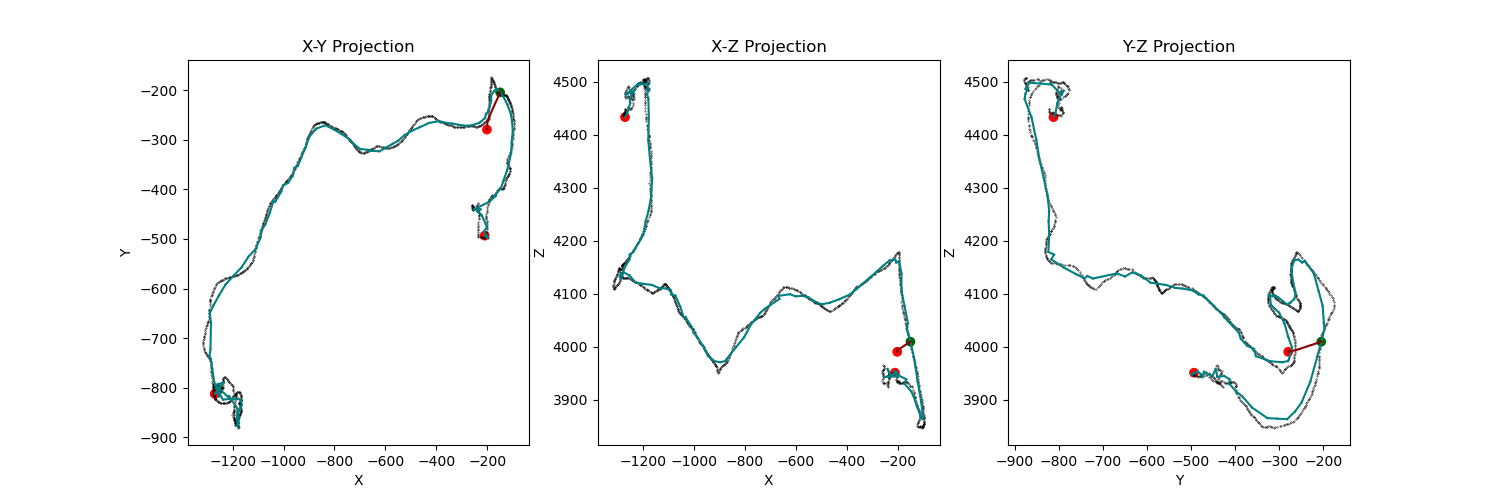

In [123]:
# Apply smoothing algorithm
# Compute rolling averages
r_size = 2

df['x_prev'] = df['x'].rolling(r_size, min_periods=1).mean().shift(1)
df['y_prev'] = df['y'].rolling(r_size, min_periods=1).mean().shift(1)
df['z_prev'] = df['z'].rolling(r_size, min_periods=1).mean().shift(1)

df['x_next'] = df['x'].iloc[::-1].rolling(r_size, min_periods=1).mean().iloc[::-1].shift(-1)
df['y_next'] = df['y'].iloc[::-1].rolling(r_size, min_periods=1).mean().iloc[::-1].shift(-1)
df['z_next'] = df['z'].iloc[::-1].rolling(r_size, min_periods=1).mean().iloc[::-1].shift(-1)

# Define projection function
def project_onto_line(p, a, b):
    """Project point p onto line defined by points a and b."""
    ap = p - a
    ab = b - a
    ab_unit = ab / np.linalg.norm(ab)  # Normalize
    proj_length = np.dot(ap, ab_unit)  # Scalar projection
    proj_point = a + proj_length * ab_unit  # Convert back to point
    return proj_point

# Apply projection for each row
for i in range(len(df)):
    p = np.array([df.loc[i, 'x'], df.loc[i, 'y'], df.loc[i, 'z']])
    a = np.array([df.loc[i, 'x_prev'], df.loc[i, 'y_prev'], df.loc[i, 'z_prev']])
    b = np.array([df.loc[i, 'x_next'], df.loc[i, 'y_next'], df.loc[i, 'z_next']])
    
    if not np.isnan(a).any() and not np.isnan(b).any():
        proj_p = project_onto_line(p, a, b)
        df.loc[i, ['x', 'y', 'z']] = proj_p  # Replace with projected point

# Drop helper columns if not needed
df.drop(columns=['x_prev', 'y_prev', 'z_prev', 'x_next', 'y_next', 'z_next'], inplace=True)

# Create subplots
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
# Plot xy projection
plot_tracks(axs[0], df['x'], df['y'], connection_count, 'X', 'Y', Tracks)
axs[0].scatter(data_true['x'], data_true['y'], marker='o',c="k", s=0.1)
# axs[0].scatter(data.x, data.y, c=colors, marker='o', alpha=0.5,s=3)

# Plot xz projection
plot_tracks(axs[1], df['x'], df['z'], connection_count, 'X', 'Z', Tracks)
axs[1].scatter(data_true['x'], data_true['z'], marker='o',c="k", s=0.1)
# axs[1].scatter(data.x, data.z, c=colors, marker='o', alpha=0.5,s=3)

# Plot yz projection
plot_tracks(axs[2], df['y'], df['z'], connection_count, 'Y', 'Z', Tracks)
axs[2].scatter(data_true['y'], data_true['z'], marker='o',c="k", s=0.1)
# axs[2].scatter(data.y, data.z, c=colors, marker='o', alpha=0.5,s=3)
